In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%pip install -q decorator==5.0.9
!pip install -q ipywidgets

import csv
import math
import re
import imp
import json
import base64
import numpy as np
import pandas as pd
import difflib as dl
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q cltk==1.0.22
%pip install -q strsim
%pip install -q leven

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [130]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures
import similarities.cosine as thesisCosineSimilarities
import similarities.levenshtein as thesisLevenshteinSimilarities
import vocabulary.vocabulary as thesisVocabulary
import features.lexical as thesisLexicalFeatures
import similarities.cosine as thesisCosineSimilarity
import text_cleanup.text_cleanup as thesisTextCleanUp
import p_aligment.p_aligment as thesisPAligment
import features.model_features as thesisModelFeatures

imp.reload(thesisTfIdfNgramFeatures)
imp.reload(thesisLexicalFeatures)
imp.reload(thesisCosineSimilarity)
imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

imp.reload(thesisVocabulary)
imp.reload(thesisCosineSimilarities)
imp.reload(thesisTextCleanUp)
imp.reload(thesisCountVectorizerNgramFeatures)
imp.reload(thesisPAligment)
imp.reload(thesisLevenshteinSimilarities)
imp.reload(thesisModelFeatures)

<module 'features.model_features' from '../src/features/model_features.py'>

# Important features

In [9]:
london_vs_zwickau_best_model = thesisModelFeatures.get_london_vs_zwickau_best_model()

In [13]:
for i in london_vs_zwickau_best_model.feature_importances_:
    if i > 0:
        print(i)

0.008
0.024
0.015
0.002
0.004
0.086
0.008
0.007
0.002
0.002
0.003
0.001
0.044
0.038
0.023
0.006
0.01
0.01
0.005
0.022
0.001
0.014
0.005
0.007
0.002
0.018
0.004
0.001
0.006
0.005
0.008
0.001
0.004
0.015
0.005
0.067
0.025
0.002
0.011
0.002
0.007
0.003
0.003
0.023
0.015
0.001
0.018
0.025
0.002
0.01
0.004
0.015
0.006
0.005
0.016
0.003
0.014
0.002
0.016
0.009
0.001
0.023
0.039
0.217


In [14]:
zwickau_vs_burchard_best_model = thesisModelFeatures.get_zwickau_vs_burchard_best_model()

In [15]:
for i in zwickau_vs_burchard_best_model.feature_importances_:
    if i > 0:
        print(i)

0.0015
0.0005
0.0005
0.0005
0.001
0.0015
0.0005
0.0005
0.004
0.0005
0.0015
0.002
0.0065
0.0005
0.0005
0.0045
0.0005
0.001
0.0085
0.0025
0.0005
0.001
0.0005
0.001
0.002
0.0005
0.0015
0.0005
0.0025
0.001
0.0005
0.0025
0.004
0.0005
0.0045
0.0005
0.0015
0.0015
0.0045
0.0005
0.002
0.0005
0.004
0.003
0.001
0.0005
0.0005
0.005
0.0015
0.0005
0.0005
0.0005
0.0135
0.0025
0.001
0.0005
0.001
0.0015
0.002
0.001
0.0005
0.0065
0.002
0.0035
0.0015
0.0005
0.004
0.001
0.0015
0.0035
0.001
0.0035
0.001
0.0005
0.0015
0.0005
0.001
0.0005
0.0005
0.002
0.0005
0.0005
0.0005
0.0005
0.0055
0.002
0.0065
0.001
0.0005
0.0005
0.0005
0.0005
0.0005
0.0015
0.0005
0.0005
0.0005
0.0005
0.0005
0.002
0.0025
0.0045
0.003
0.002
0.0005
0.0065
0.002
0.0005
0.0005
0.001
0.0005
0.0015
0.001
0.0075
0.0005
0.001
0.0005
0.0005
0.0035
0.0005
0.0015
0.0005
0.001
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0075
0.0005
0.0005
0.004
0.0005
0.0005
0.001
0.0045
0.0005
0.0005
0.001
0.001
0.0005
0.0005
0.0005
0.0005
0.0155
0.003
0.00

In [19]:
print(len(zwickau_vs_burchard_best_model.feature_importances_))
print(len(london_vs_zwickau_best_model.feature_importances_))

49711
44659


In [20]:
test_df =    thesisModelFeatures.create_features_df(
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_london_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))),
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_zwickau_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_zwickau_pre_post_processing_map()
        ))),
        None,
        n_gram = (2,5),
        features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
    )

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [21]:
X, y = thesisModelFeatures.create_X_y(test_df)

In [22]:
X

,a,a,a a,a ac,a al,a ap,a b,a be,a c,a ca,...,zuca,zucar,zy,zyd,zyda,zyda,zyp,zyph,zyph,inner_mean_cosine_similarity_score
0,0.018183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078201
1,0.010217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090889
2,0.009396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105741
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108059
4,0.058013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.046745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058640
319,0.008553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090668
320,0.008774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109113
321,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076432


In [43]:
thesisModelFeatures.create_london_zwickau_without_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df()

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


,index,corpus_version_label,a,a,a a,a ac,a al,a ap,a b,a be,...,xulta,xum,xum,xum f,xum i,xum p,xus,xus,xus c,inner_mean_cosine_similarity_score
0,0.0,0.0,0.019092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086218
1,1.0,0.0,0.010408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094690
2,2.0,0.0,0.009825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114396
3,3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111445
4,4.0,0.0,0.060724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,161.0,1.0,0.047605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061046
319,162.0,1.0,0.008837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095615
320,163.0,1.0,0.009084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113936
321,164.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080858


<AxesSubplot:>

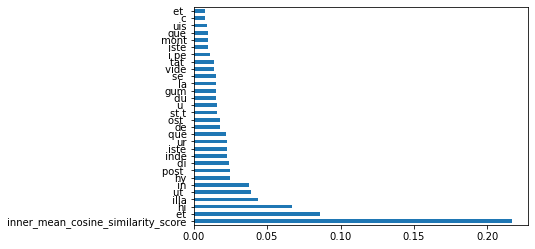

In [34]:
(pd.Series(london_vs_zwickau_best_model.feature_importances_, index=X.columns)
   .nlargest(30)
   .plot(kind='barh')) 

In [31]:
list(zip(london_vs_zwickau_best_model.feature_importances_, X.columns))

[(0.0, ' a'),
 (0.0, ' a '),
 (0.0, ' a a'),
 (0.0, ' a ac'),
 (0.0, ' a al'),
 (0.0, ' a ap'),
 (0.0, ' a b'),
 (0.0, ' a be'),
 (0.0, ' a c'),
 (0.0, ' a ca'),
 (0.0, ' a ch'),
 (0.0, ' a ci'),
 (0.0, ' a cr'),
 (0.0, ' a d'),
 (0.0, ' a da'),
 (0.0, ' a de'),
 (0.0, ' a di'),
 (0.0, ' a do'),
 (0.0, ' a e'),
 (0.0, ' a et'),
 (0.0, ' a f'),
 (0.0, ' a fa'),
 (0.0, ' a fi'),
 (0.0, ' a fl'),
 (0.0, ' a g'),
 (0.0, ' a go'),
 (0.0, ' a i'),
 (0.0, ' a io'),
 (0.0, ' a is'),
 (0.0, ' a j'),
 (0.0, ' a ja'),
 (0.0, ' a l'),
 (0.0, ' a la'),
 (0.0, ' a lo'),
 (0.0, ' a m'),
 (0.0, ' a ma'),
 (0.0, ' a me'),
 (0.0, ' a mo'),
 (0.0, ' a n'),
 (0.0, ' a ne'),
 (0.0, ' a o'),
 (0.0, ' a oc'),
 (0.0, ' a p'),
 (0.0, ' a pa'),
 (0.0, ' a ph'),
 (0.0, ' a po'),
 (0.0, ' a py'),
 (0.0, ' a q'),
 (0.0, ' a qu'),
 (0.0, ' a r'),
 (0.0, ' a ra'),
 (0.0, ' a re'),
 (0.0, ' a ro'),
 (0.0, ' a s'),
 (0.0, ' a sa'),
 (0.0, ' a se'),
 (0.0, ' a si'),
 (0.0, ' a so'),
 (0.0, ' a su'),
 (0.0, ' a sy'),
 (

In [26]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

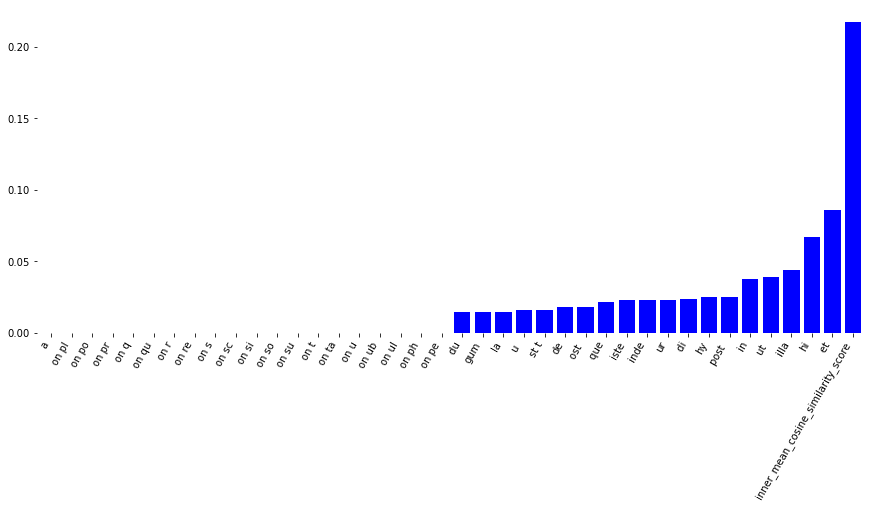

In [28]:
plt.figure(figsize=(15, 6))
plot_important_features(london_vs_zwickau_best_model.feature_importances_, X.columns)
ax = plt.gca()
plt.show()

In [37]:
len(thesisDataReader.get_london_poorly_similar_with_chops_long_p_corpus())

157

In [38]:
len(list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_london_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))))

157

In [40]:
len(thesisDataReader.get_zwickau_poorly_similar_with_chops_long_p_corpus())

166

In [41]:
len(list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_zwickau_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_zwickau_pre_post_processing_map()
        ))))

166

In [46]:
len(thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_london_base_long_p_corpus())

209

# create and save london vs burchard with processing best model

In [48]:
grid_search_cv_result = thesisModelFeatures.run_grid_search_cv(thesisModelFeatures.create_london_burchard_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df(), ['RandomForestClassifier'])

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
testing classifiers: ['RandomForestClassifier']
running: RandomForestClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.72972973 0.73243243 0.74069069 0.74069069 0.74602102 0.7515015
 0.74061562 0.74061562 0.72972973 0.73243243 0.74069069 0.74069069
 0.74602102 0.7515015  0.74061562 0.74061562 0.5792042  0.5765015
 0.5737988  0.5737988  0.5737988  0.5737988  0.5710961  0.5710961
 0.74572072 0.7268018  0.74046547 0.74054054 0.74039039 0.75683183
 0.76238739 0.75968468 0.74572072 0.7268018  0.74046547 0.74054054
 0.74039039 0.75683183 0.76238739 0.75968468 0.57642643 0.5737988
 0.5792042  0.5765015  0.5765015  0.5737988  0.5737988  0.5710961
 0.73513514 0.74602102 0.7515015  0.7515015  0.7542042  0.75960961
 0.75698198 0.75698198 0.73513514 0.74602102 0.7515015  0.7515015
 0.7542042  0.75960961 0.75698198 0.75698198 0.59842342 0.5792042
 0.58460961 0.58190691 0.58190691 0.58190691 0.5765015  0.5737988
 0.72417417 0.73528529 0.74084084 0.7515

In [61]:
grid_search_cv_result[1][0].best_score_

0.7816066066066066

In [54]:
X, y = thesisModelFeatures.create_X_y(thesisModelFeatures.create_london_burchard_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df())

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [55]:
randomForestClassifier = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 12,
    max_features = 'auto',
    n_estimators = 400,
    random_state = 0
).fit(X, y)

In [62]:
thesisModelFeatures.save_london_vs_burchard_best_model(randomForestClassifier, "with_word_processing_RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=400, random_state=0)_0.7816")

# london vs burchard with word processing important features

<AxesSubplot:>

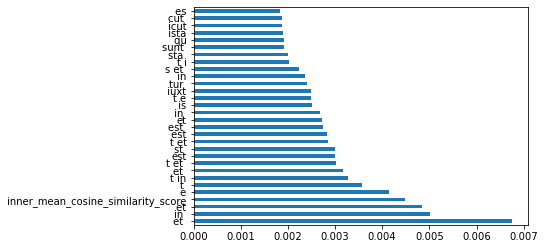

In [65]:
(pd.Series(randomForestClassifier.feature_importances_, index=X.columns)
   .nlargest(30)
   .plot(kind='barh')) 

In [80]:
pd.DataFrame(
    [[importance, X.columns[index].replace(' ', '_')] for index, importance in enumerate(randomForestClassifier.feature_importances_)],
    columns = ['importance', 'feature']
).to_csv('../computed_data/models/london_vs_burchard/best_models/with_word_processing_RandomForestClassifier_strong_features.csv')

# create and save zwickau vs burchard with processing best model

In [81]:
grid_search_cv_result = thesisModelFeatures.run_grid_search_cv(thesisModelFeatures.create_zwickau_burchard_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df(), ['AdaBoostClassifier'])

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
testing classifiers: ['AdaBoostClassifier']
running: AdaBoostClassifier


In [82]:
grid_search_cv_result

(Empty DataFrame
 Columns: []
 Index: [],
 [GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
               param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2],
                           'n_estimators': [5, 10, 30, 50, 100, 300, 500, 1000,
                                            2000]},
               return_train_score=True)])

In [83]:
grid_search_cv_result[1][0].best_score_

0.8749644381223328

In [84]:
grid_search_cv_result[1][0].best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=2000)

In [85]:
X, y = thesisModelFeatures.create_X_y(thesisModelFeatures.create_zwickau_burchard_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df())

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [86]:
adaBooster = AdaBoostClassifier(learning_rate=1, n_estimators=2000).fit(X, y)

In [87]:
thesisModelFeatures.save_zwickau_vs_burchard_best_model(adaBooster, "with_word_processing_AdaBoostClassifier(learning_rate=1, n_estimators=2000)_0.8749")

# zwickau vs burchard with word processing important features

In [94]:
pd.DataFrame(
    [[importance, X.columns[index].replace(' ', '_')] for index, importance in enumerate(adaBooster.feature_importances_)],
    columns = ['importance', 'feature']
).to_csv('../computed_data/models/zwickau_vs_burchard/best_models/with_word_processing_AdaBoostClassifier_strong_features.csv')

# create and save zwickau vs london with processing best model

In [95]:
#todo

# zwickau vs london with word processing important features

In [96]:
# todo

# xgboost greedSearchCV

### zwickau vs burchard

In [97]:
london_burchard_df = thesisModelFeatures.create_zwickau_burchard_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df()

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [98]:
london_burchard_df

,index,corpus_version_label,a,a,a a,a ac,a ad,a al,a ap,a au,...,xum,xum,xum i,xus,xus,xus a,xus c,xus e,xus l,inner_mean_cosine_similarity_score
0,0.0,1.0,0.020312,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096161
1,1.0,1.0,0.038600,0.018579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176266
2,2.0,1.0,0.054843,0.014848,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116473
3,3.0,1.0,0.034370,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121971
4,4.0,1.0,0.034477,0.024892,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,204.0,2.0,0.042164,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240152
371,205.0,2.0,0.049106,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163810
372,206.0,2.0,0.044411,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265345
373,207.0,2.0,0.032530,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207442


In [102]:
xgbClassifier_london_burchard_results = thesisModelFeatures.run_grid_search_cv(london_burchard_df, ['XGBClassifier'])

testing classifiers: ['XGBClassifier']
running: XGBClassifier


In [111]:
xgbClassifier_london_burchard_results[1][0].best_score_

0.8564011379800853

In [115]:
xgbClassifier_london_burchard_results[1][0].best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
# with gamma
xgbClassifier__with_gamma_london_burchard_results = thesisModelFeatures.run_grid_search_cv(london_burchard_df, ['XGBClassifier'])

testing classifiers: ['XGBClassifier']
running: XGBClassifier


In [121]:
xgbClassifier__with_gamma_london_burchard_results[1][0].best_score_

0.8643669985775249

In [125]:
xgbClassifier__with_gamma_london_burchard_results[1][0].best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [127]:
# with gamma with subsample
xgbClassifier__with_gamma_subsample_london_burchard_results = thesisModelFeatures.run_grid_search_cv(london_burchard_df, ['XGBClassifier'])

testing classifiers: ['XGBClassifier']
running: XGBClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [128]:
xgbClassifier__with_gamma_subsample_london_burchard_results[1][0].best_score_

0.8643669985775249

In [129]:
xgbClassifier__with_gamma_subsample_london_burchard_results[1][0].best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [113]:
xgbrfClassifier_london_burchard_results = thesisModelFeatures.run_grid_search_cv(london_burchard_df, ['XGBRFClassifier'])

testing classifiers: ['XGBRFClassifier']
running: XGBRFClassifier


In [114]:
xgbrfClassifier_london_burchard_results[1][0].best_score_

0.7953058321479374

In [122]:
# with gamma
xgbrfClassifier_with_gamma_london_burchard_results = thesisModelFeatures.run_grid_search_cv(london_burchard_df, ['XGBRFClassifier'])

testing classifiers: ['XGBRFClassifier']
running: XGBRFClassifier


In [123]:
xgbrfClassifier_with_gamma_london_burchard_results[1][0].best_score_

0.7953058321479374

### london vs burchard

In [131]:
london_burchard_df = thesisModelFeatures.create_london_burchard_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df()

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [132]:
xgbClassifier_london_burchard_results_2 = thesisModelFeatures.run_grid_search_cv(london_burchard_df, ['XGBClassifier'])

testing classifiers: ['XGBClassifier']
running: XGBClassifier


In [133]:
xgbClassifier_london_burchard_results_2[1][0].best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)